In [1]:
import numpy as np

#정규방정식 테스트
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [2]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.85993075],
       [3.11653209]])

In [3]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.85993075],
       [10.09299492]])

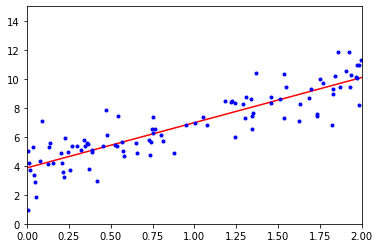

In [4]:
import matplotlib.pyplot as plt

plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_


(array([3.85993075]), array([[3.11653209]]))

In [6]:
lin_reg.predict(X_new)

array([[ 3.85993075],
       [10.09299492]])

In [7]:
theta_best_svd,residual,rank, s=np.linalg.lstsq(X_b,y,rcond= 1e-6)
theta_best_svd

array([[3.85993075],
       [3.11653209]])

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[3.85993075],
       [3.11653209]])

In [9]:
eta = 0.1 #learnig rate
n_iterations = 1000
m=100

theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients

theta

array([[3.85993075],
       [3.11653209]])

In [10]:
eta = 0.2 #learnig rate
n_iterations = 1000
m=100

theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients

theta

array([[3.85993075],
       [3.11653209]])

In [11]:
eta = 0.5 #learnig rate
n_iterations = 1000
m=100

theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
    theta = theta - eta * gradients

theta

array([[-3.81143055e+49],
       [-4.52561917e+49]])

In [12]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t): return t0 /( t+t1)
    
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1] 
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i) 
        theta = theta - eta * gradients



In [13]:
theta

array([[3.8533866 ],
       [3.05859286]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 100, tol = 1e-3, penalty = None,eta0 = 0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_,sgd_reg.coef_

(array([3.89906916]), array([3.1621613]))

In [15]:
m=100
X= 6*np.random.rand(m,1)-3
y = 0.5 * X**2  +X +2 +np.random.randn(m,1)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X)
X[0]



array([1.736785])

In [17]:
X_poly[0]


array([1.736785  , 3.01642215])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.74767437]), array([[0.95514612, 0.51657226]]))

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) 
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
    


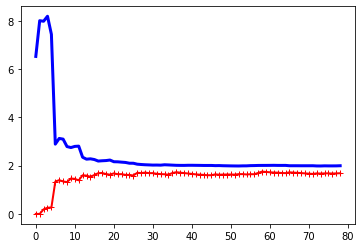

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

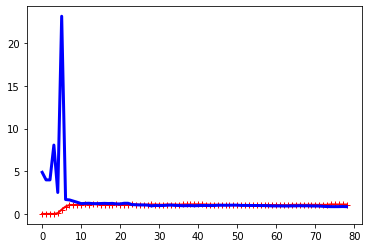

In [21]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree = 3, include_bias=False)),
    ("lin_reg", LinearRegression())

])

plot_learning_curves(polynomial_regression,X,y)

In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.57749349]])

In [23]:
sgd_reg = SGDRegressor(penalty ="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.56977487])

In [24]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.53029346])

In [25]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha =0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.5337185])

In [27]:
'''
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures




poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler",StandardScaler())
    
])


X_train_poly_scaled = poly_scaler.fit_transform(X_train)
x_val_poly_scaled = poly_scaler.trasform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol= -np.infty, warm_start = True,
                      penaly= None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch 
        best_model = clone(sgd_reg)
'''

'\nfrom sklearn.base import clone\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import PolynomialFeatures\n\n\n\n\npoly_scaler = Pipeline([\n    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),\n    ("std_scaler",StandardScaler())\n    \n])\n\n\nX_train_poly_scaled = poly_scaler.fit_transform(X_train)\nx_val_poly_scaled = poly_scaler.trasform(X_val)\n\nsgd_reg = SGDRegressor(max_iter=1, tol= -np.infty, warm_start = True,\n                      penaly= None, learning_rate="constant", eta0=0.0005)\n\nminimum_val_error = float("inf")\nbest_epoch = None\nbest_model = None\n\nfor epoch in range(1000):\n    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off y_val_predict = sgd_reg.predict(X_val_poly_scaled)\n    val_error = mean_squared_error(y_val_predict, y_val)\n    if val_error < minimum_val_error:\n        minimum_val_error = val_error\n        best_epoch = epoch \n        best_model = clone(sgd_reg)\n'

In [28]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [29]:
X = iris["data"][:,3:]
y=(iris["target"] == 2).astype(np.int)

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

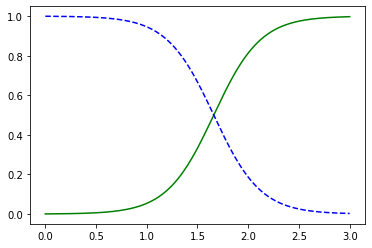

In [31]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")


In [32]:
X = iris["data"][:,(2,3)]
y=(iris["target"] == 2)

softmax_reg = LogisticRegression(multi_class="multinomial", solver ="lbfgs", C= 10)
softmax_reg.fit(X,y)



LogisticRegression(C=10, multi_class='multinomial')

In [33]:
softmax_reg.predict([[5,2]])

array([ True])

In [34]:
softmax_reg.predict_proba([[5,2]])

array([[0.04659024, 0.95340976]])